<a href="https://colab.research.google.com/github/Nikita1013/Machine-Learning-with-Python/blob/master/Deep_Learning_Project_1_Breats_Cancer_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Breast Cancer Classification with a simple Neural Network (NN).**

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data Collection & Processing

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loading the data to a dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [5]:
#print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# print the last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target


In [8]:
# number of rows and columns in dataset
data_frame.shape

(569, 31)

In [9]:
# getting the info about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# checking the missing values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [11]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# checking the distribution of the Target Variable
data_frame['label'].value_counts()

,count
label,
1,357
0,212


1 -->  Benign

2 --> Malignant

In [13]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [14]:
X = data_frame.drop(columns='label', axis = 1)
Y = data_frame['label']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Splitting the data into training and testing data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the Data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [34]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


**Building the Neural Network**

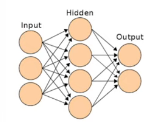

* Tensorflow is a Deep Learning Library that is developed by Google.

* Can Create Newral networs easily

* widely used libraries for Deep Learning are Tensorflow and PyTorch

Keras is not a Stand alone library it is just a wrapper of the tensorflow and keras

In [20]:
# importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)  # Whenever we are training a neural network in Keras There are several weights and parameters that will be initiallized
from tensorflow import keras

In [25]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [29]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# training the neural network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5301 - loss: 0.8001 - val_accuracy: 0.8913 - val_loss: 0.4656
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8014 - loss: 0.5429 - val_accuracy: 0.9783 - val_loss: 0.3146
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8904 - loss: 0.3596 - val_accuracy: 0.9783 - val_loss: 0.2212
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9040 - loss: 0.2546 - val_accuracy: 0.9783 - val_loss: 0.1731
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9182 - loss: 0.1984 - val_accuracy: 0.9783 - val_loss: 0.1470
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9376 - loss: 0.1657 - val_accuracy: 0.9783 - val_loss: 0.1310
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9481 - loss: 0.1441 - val_accuracy: 0.9783 - val_loss: 0.1194
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9611 - loss: 0.1283 - val_accuracy: 0.9783 - val_lo

Visualizing the Accuracy and loss

/tmp/ipython-input-1089814456.py:8: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('train' , 'val', loc='lower right')


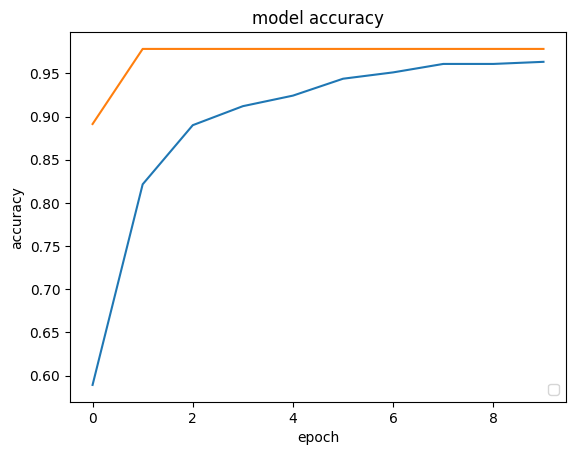

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend('train' , 'val', loc='lower right')

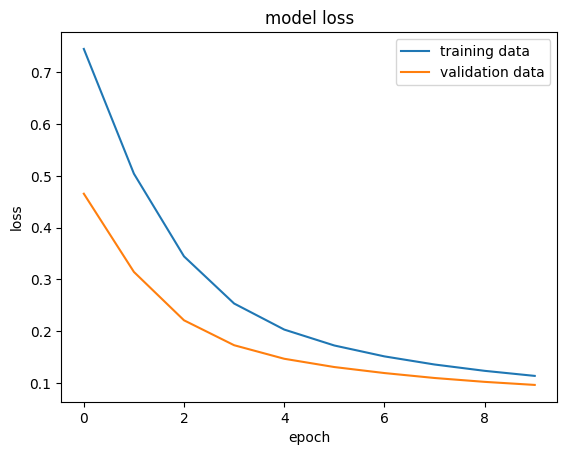

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['training data','validation data'], loc='upper right')



To get the Accuracy of the model on test data

In [42]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9470 - loss: 0.1396 
0.9561403393745422


In [44]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [48]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [49]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.10060122 0.0915909 ]


In [52]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [50]:
print(Y_pred)

[[1.0060122e-01 9.1590904e-02]
 [3.8449225e-01 4.9570739e-01]
 [2.0465070e-02 9.1773051e-01]
 [7.4866837e-01 5.1383463e-06]
 [4.0281472e-01 4.3763477e-01]
 [8.4445465e-01 1.3922566e-02]
 [1.7768770e-01 6.7959863e-01]
 [2.2556970e-02 7.4525946e-01]
 [7.0000239e-02 7.2892004e-01]
 [4.8987422e-02 5.4759556e-01]
 [3.1813630e-01 2.6106185e-01]
 [8.3933614e-02 8.0681974e-01]
 [6.8982437e-02 3.1197041e-01]
 [1.9035491e-01 6.5429103e-01]
 [3.4559347e-02 8.3253235e-01]
 [4.9705583e-01 2.9694865e-02]
 [2.5895821e-02 7.8866816e-01]
 [5.4692376e-02 7.3340237e-01]
 [5.6487847e-02 6.1208385e-01]
 [7.9227823e-01 6.1855458e-02]
 [9.0333534e-04 3.3799597e-04]
 [4.0961489e-02 8.2266831e-01]
 [4.6747610e-02 7.7677572e-01]
 [2.5421150e-02 7.5157505e-01]
 [1.1581414e-01 5.1527071e-01]
 [7.2479260e-01 7.0009544e-02]
 [1.3299319e-01 7.0883030e-01]
 [2.6559588e-01 4.6755680e-01]
 [6.6210395e-01 1.2605555e-01]
 [7.4502343e-01 8.1095666e-02]
 [8.5024141e-02 4.4204852e-01]
 [7.8472286e-02 7.3822594e-01]
 [9.2620

* model.predict() gives the prediction probability of each class for that datapoint.

In [54]:
# argmax function

my_list = [0.56, 0.25]

index_of_max_value = np.argmax(my_list)

print(my_list)
print(index_of_max_value)

[0.56, 0.25]
0


In [55]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1)

Building the Predictive system

In [58]:
input_data = (14.25,22.15,96.42,645.7,0.1049,0.2008,0.2135,0.08653,0.1949,0.07292,0.7036,1.268,5.373,60.78,0.009407,0.07056,0.06899,0.01848,0.017,0.006113,17.67,29.51,119.1,959.5,0.164,0.6247,0.6922,0.1785,0.2844,0.1132)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)

print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0]==0):
  print('The  tumor is Malignant')
else:
  print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.42179444 0.03106397]]
[np.int64(0)]
The  tumor is Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
